Simulation complete. GIF saved as 'potts_simulation.gif'.


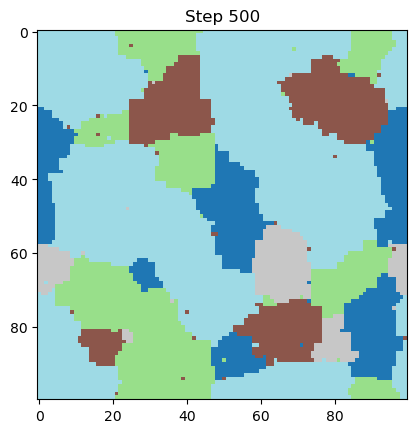

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def initialize_lattice(L, q):
    """
    Initialize a 2D lattice with random states from 0 to q-1.
    """
    return np.random.randint(0, q, size=(L, L))

def delta_energy(lattice, x, y, q):
    """
    Compute the change in energy for flipping the state at site (x, y).
    """
    L = lattice.shape[0]
    current_state = lattice[x, y]
    
    # Propose a new state different from the current one
    proposed_state = np.random.choice([s for s in range(q) if s != current_state])
    
    # Calculate energy contribution from neighbors
    neighbors = [
        lattice[(x - 1) % L, y],  # Top neighbor
        lattice[(x + 1) % L, y],  # Bottom neighbor
        lattice[x, (y - 1) % L],  # Left neighbor
        lattice[x, (y + 1) % L],  # Right neighbor
    ]
    
    current_energy = -sum(1 if n == current_state else 0 for n in neighbors)
    proposed_energy = -sum(1 if n == proposed_state else 0 for n in neighbors)
    
    delta_E = proposed_energy - current_energy
    
    return delta_E, proposed_state

def monte_carlo_step(lattice, q, beta):
    """
    Perform one Monte Carlo step using the Metropolis algorithm.
    """
    L = lattice.shape[0]
    
    for _ in range(L * L):  # Attempt to update each site once on average
        x = np.random.randint(0, L)
        y = np.random.randint(0, L)
        
        delta_E, proposed_state = delta_energy(lattice, x, y, q)
        
        # Metropolis acceptance criterion
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            lattice[x, y] = proposed_state

def simulate_potts_gif(L=20, q=3, beta=0.5, steps=1000, gif_filename="potts_simulation.gif"):
    """
    Simulate the Potts model on a 2D square lattice and save a GIF of the configurations.
    
    Parameters:
        L (int): Linear size of the lattice (LxL).
        q (int): Number of possible states per site.
        beta (float): Inverse temperature (1/kT).
        steps (int): Number of Monte Carlo steps to perform.
        gif_filename (str): Filename for the output GIF.
        
    Returns:
        None: Saves the GIF to disk.
    """
    lattice = initialize_lattice(L, q)
    
    # Set up figure for animation
    fig, ax = plt.subplots()
    cmap = plt.get_cmap("tab20", q)  # Use a colormap with `q` discrete colors
    im = ax.imshow(lattice, cmap=cmap, interpolation="nearest")
    
    def update(frame):
        """
        Update function for animation.
        """
        monte_carlo_step(lattice, q, beta)
        im.set_array(lattice)
        ax.set_title(f"Step {frame + 1}")
        return [im]
    
    # Create animation
    anim = FuncAnimation(fig, update, frames=steps, interval=50, blit=True)
    
    # Save animation as GIF
    writer = PillowWriter(fps=20)
    anim.save(gif_filename, writer=writer)
    
    print(f"Simulation complete. GIF saved as '{gif_filename}'.")

# Simulation parameters
L = 100          # Lattice size
q = 5           # Number of states
beta = 2    # Inverse temperature
steps = 500     # Number of Monte Carlo steps

# Run simulation and save as GIF
simulate_potts_gif(L=L, q=q, beta=beta, steps=steps)
